In [ ]:
import sys
!{sys.executable} -m pip install spatial-image-multiscale matplotlib ipfsspec

In [1]:
from spatial_image_multiscale import to_multiscale

import xarray as xr

from ipfsspec import IPFSFileSystem 

In [2]:
fs = IPFSFileSystem()
cid = "bafybeibpqky6d335duxtkmwowcc6igt2q5qorqd7e5xqfoxlfxm4pozg74"
store = fs.get_mapper(f"ipfs://{cid}/input/cthead1.zarr")

In [3]:
image_ds = xr.open_zarr(store)
image_ds

<xarray.Dataset>
Dimensions:  (y: 256, x: 256)
Coordinates:
  * x        (x) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
  * y        (y) float64 0.0 1.0 2.0 3.0 4.0 ... 251.0 252.0 253.0 254.0 255.0
Data variables:
    cthead1  (y, x) uint8 dask.array<chunksize=(64, 64), meta=np.ndarray>

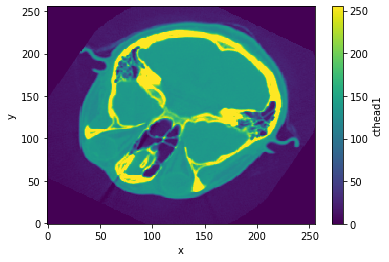

In [4]:
image = image_ds.cthead1
image.plot.imshow()

In [5]:
multiscale = to_multiscale(image, [2,4])

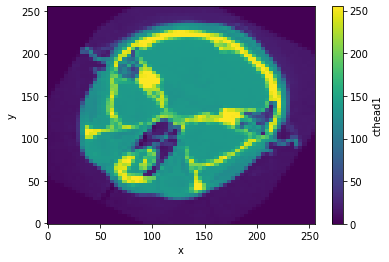

In [6]:
multiscale['2'].ds.cthead1.plot.imshow()

In [45]:
import itk
import numpy as np

In [8]:
i = itk.image_from_xarray(image)

In [9]:
i

<itk.itkImagePython.itkImageUC2; proxy of <Swig Object of type 'itkImageUC2 *' at 0x7f267c4b8510> >

In [11]:
import matplotlib.pyplot as plt

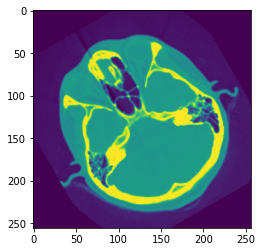

In [12]:
plt.imshow(i)

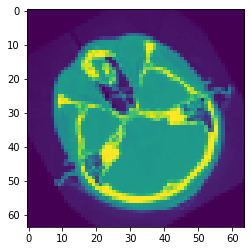

In [17]:
plt.imshow(itk.bin_shrink_image_filter(i, shrink_factors=[4,4]))

In [23]:
dir(image)

['T',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__

In [24]:
image.chunks

((64, 64, 64, 64), (64, 64, 64, 64))

In [25]:
image[image.chunks[0]]

IndexError: too many indices

In [31]:
image.data.blocks[0].shape

(64, 256)

In [47]:
ct = multiscale['1'].ds.cthead1

In [48]:
ct

<xarray.DataArray 'cthead1' (y: 128, x: 128)>
dask.array<rechunk-merge, shape=(128, 128), dtype=float64, chunksize=(128, 128), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 0.5 2.5 4.5 6.5 8.5 ... 246.5 248.5 250.5 252.5 254.5
  * y        (y) float64 0.5 2.5 4.5 6.5 8.5 ... 246.5 248.5 250.5 252.5 254.5
Attributes:
    direction:  [[1.0, 0.0], [0.0, 1.0]]

In [39]:
64*64*64*8

2097152

overflow encountered in double_scalars
overflow encountered in double_scalars


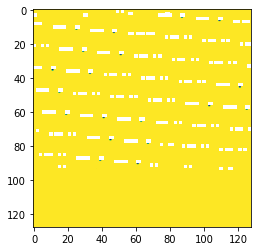

In [51]:
plt.imshow(itk.bin_shrink_image_filter(ct.as_numpy()))

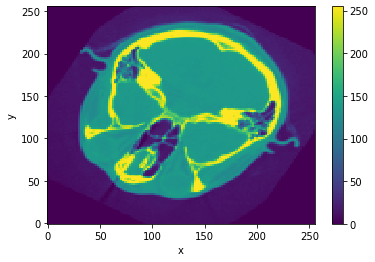

In [64]:
x = ct.as_numpy()
i = itk.image_from_xarray(ct)
itk.bin_shrink_image_filter(ct).plot.imshow()

In [75]:
block_0 = ct[tuple([slice(0, s) for s in ct.data.blocks[0].shape])]

In [80]:
i = itk.image_from_xarray(block_0)
filt = itk.BinShrinkImageFilter.New(i, shrink_factors=[2,2])
filt.UpdateOutputInformation()
image_info = filt.GetOutput()
print(image_info.GetSpacing())
print(image_info.GetOrigin())

itkVectorD2 ([4, 4])
itkPointD2 ([1.5, 1.5])


In [83]:
sf = {'x':2, 'y':4}
sff = [sf[f] for f in sf if f in {'x',}]
sff

[2]